In [0]:
!git clone https://github.com/sagihaider/CE888_2020.git

fatal: destination path 'CE888_2020' already exists and is not an empty directory.


In [0]:
# Upload data
from zipfile import ZipFile
file_name = "/content/CE888_2020/Lab_8/data.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


CE888_2020  cellphone.zip  data  sample_data  test_samples  training


Install packages tensorflow 1.3.0 and keras 2.0.7

In [0]:
!pip install tensorflow==1.3.0
!pip install keras==2.0.7

     |████████████████████████████████| 43.6MB 69kB/s 
     |████████████████████████████████| 1.6MB 40.1MB/s 
     |████████████████████████████████| 890kB 46.7MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=4f7c005652e577aa392c94717036388248645f63c691cbe4f6b3dfea9ebe73ec
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
ERROR: stable-baselines 2.2.1 has requirement tensorflow>=1.5.0, but you'll have tensorflow 1.3.0 which is incompatible.
ERROR: magenta 0.3.19 has requirement tensorflow>=1.12.0, but you'll have tensorflow 1.3.0 which is incompatible.
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.0
    Uninstalling bleach-3.1.0:
      Successfully uninstalled bleach-3.1.0
  Found existing installation: tensorflow 1.15.0
    Uninst

In [0]:
import numpy as np
import os
import time
from CE888_2020.Lab_8.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [0]:
#%% Load an elephant image as an example and see the image-processing

img_path = '/content/CE888_2020/Lab_8/elephant.jpg' # image name
img = image.load_img(img_path, target_size=(224, 224)) # load image
x = image.img_to_array(img) # convert image to array
print (x.shape)
x = np.expand_dims(x, axis=0) # expand dimension
print (x.shape)
x = preprocess_input(x)
print('Input image shape:', x.shape)

(224, 224, 3)
(1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)


In [0]:
#%% Loading the training data
PATH = os.getcwd()
# Define data path
data_path = PATH + '/data'
data_dir_list = os.listdir(data_path)

In [0]:
os.environ['KAGGLE_USERNAME'] = "nomanshafqat" # username from the json file
os.environ['KAGGLE_KEY'] = "a22e8cc322683d0d4d4d3e2ad7121b66" # key from the json file

!kaggle datasets download vitorgamalemos/cellphone

 85% 5.00M/5.87M [00:01<00:00, 3.83MB/s]
100% 5.87M/5.87M [00:01<00:00, 4.34MB/s]


In [0]:
!unzip cellphone.zip

In [0]:
!ls training/training

cellphone-NO  cellphone-YES


In [0]:
import os
data_path="training/training"
classes=os.listdir(data_path)

In [0]:
img_data_list=[] # created an empty list for images to be loaded
labels=[]
for i,clas in enumerate(classes):
	class_path=os.path.join(data_path,clas)
	for images_name in os.listdir(class_path):
		image_path=os.path.join(class_path,images_name)
		print(image_path)
		img = image.load_img(image_path, target_size=(224, 224))
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
		#x = x/255
		print('Input image shape:', x.shape)
		img_data_list.append(x)
		labels.append(i)

#%% 
img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

training/training/cellphone-NO/img23.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img95.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img18.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img66.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img97.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img111.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img88.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img106.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img57.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img42.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img96.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img22.png
Input image shape: (1, 224, 224, 3)
training/training/cellphone-NO/img53.png
Input image shape: (1, 224, 224, 

In [0]:
# Define the number of classes
num_classes = 2
print(img_data.shape[0])

# labels[0:202]=0
# labels[202:404]=1
# labels[404:606]=2
# labels[606:]=3

names = classes

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


245


In [0]:
labels

In [0]:
image_input = Input(shape=(224, 224, 3)) # shape of a single image

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet') # load VGG-16 model with 'top = true'
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
last_layer = model.get_layer('fc2').output
#x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False

custom_vgg_model.layers[3].trainable
custom_vgg_model.summary()

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
import time 
t=time.time()
#	t = now()
hist = custom_vgg_model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 196 samples, validate on 49 samples
Epoch 1/10
196/196 [==============================] - 357s - loss: 0.3992 - acc: 0.8418 - val_loss: 0.2884 - val_acc: 0.8776
Epoch 2/10
196/196 [==============================] - 355s - loss: 0.1056 - acc: 0.9490 - val_loss: 0.3089 - val_acc: 0.8980
Epoch 3/10
196/196 [==============================] - 357s - loss: 0.0444 - acc: 0.9898 - val_loss: 0.2392 - val_acc: 0.9184
Epoch 4/10
196/196 [==============================] - 355s - loss: 0.0467 - acc: 0.9847 - val_loss: 0.1827 - val_acc: 0.9388
Epoch 5/10
196/196 [==============================] - 354s - loss: 0.0090 - acc: 1.0000 - val_loss: 0.8342 - val_acc: 0.7347
Epoch 6/10
196/196 [==============================] - 352s - loss: 0.0157 - acc: 0.9949 - val_loss: 0.2329 - val_acc: 0.8980
Epoch 7/10
196/196 [==============================] - 353s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.2121 - val_acc: 0.9388
Epoch 8/10
196/196 [==============================] - 354s - loss: 0.0020 - acc:

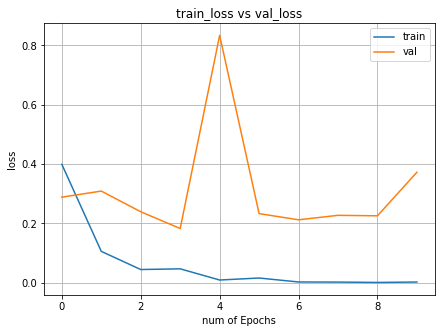

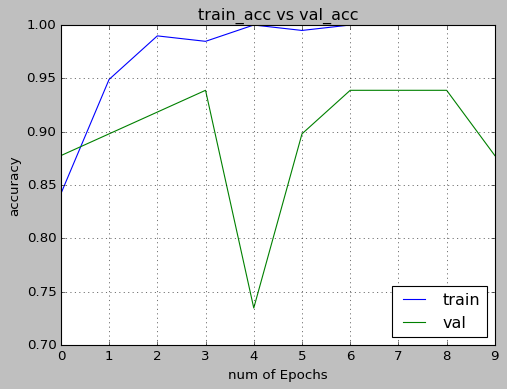

In [0]:
#%% plot
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(10)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])